# Generators (Radviz Plots)

## Notebook for generating basic radviz plots of the Pareto-optimal fronts with appropriate colorings and point-sizes.

This notebook can be used to generate customized radviz [[1]](#1) plots of all the Pareto-optimal fronts with suitable colorings and point-sizes. This notebook tests the `plot()` fucntion from the `vis.plotting.radviz` module. All the Pareto-optimal data point files hard-coded in the dictionary `pfs`. Currently this notebook provides these Pareto-optimal fronts.

- DTLZ2 ($m$-Sphere) Problem
- DEBMDK (Knee) Problem
- CDEBMDK (Constrained Knee) Problem
- C0-DTLZ2 (A split $m$-sphere with a small isolated cluster at $f_m$-axis)
- C2-DTLZ2 Problem
- DTLZ8 Problem (A 3-dimensional line and an $m$-dimensional hypersurface)
- GAA Problem (A 10-objective and 18-constraint general aviation design problem)

<a id="1">[1]</a> 
P. Hoffman, G. Grinstein and D. Pinkney, Dimensional anchors: A graphic primitive for multidimensional multivariate information visualizations", Proc. 1999 Workshop on New Paradigms in Information Visualization and Manipulation in Conjunction with the Eighth ACM Int. Conf. Information and Knowledge Management (NPIVM ’99), pp. 9-16, 1999.

In [1]:
%reload_ext autoreload
%autoreload 2

import sys
import os

import numpy as np
import matplotlib.pyplot as plt

plt.rcParams.update({'figure.max_open_warning': 0})

### Generate and save plots.

In [2]:
from viz.plotting.utils import resize_by_tradeoff, color_by_dist, color_by_cv, enhance_color, cfs

def load_props(path):
    r"""
    Load CV, Mu, Ik and S from path.
    """
    CV = None
    cvpathf = os.path.join(path, "cv.csv")
    if os.path.exists(cvpathf):
        CV = np.loadtxt(cvpathf)

    # load the Mu values
    Mu = None
    mupathf = os.path.join(path, "mu.csv")
    if os.path.exists(mupathf):
        Mu = np.loadtxt(mupathf)

    # load the knee indices
    Ik = None
    kpathf = os.path.join(path, "muid.csv")
    if os.path.exists(kpathf):
        Ik = np.loadtxt(kpathf, dtype=int)
        
    return CV, Mu, Ik

def decide_size_color(pf, dim, CV, Mu, Ik):
    r"""
    Decide point-size and color from `CV`, `Mu` and `Ik`
    """
    # decide point-size
    S = 1
    if Mu is not None and Ik is not None:
        S = resize_by_tradeoff(Mu, k=Ik)

    # decide colors
    # C = default_color(F.shape[0], alpha=0.5)
    M = np.mean(F, axis=0)
    C, D = color_by_dist(F, M)
    
    # if CV is available, use CV to color
    if CV is not None:
        pfname = pf.split('-')[0]
        if 'dtlz8' in pfname:
            C = color_by_cv(CV, factor=cfs[pfname][int(dim[:-1])])
        else:
            C = color_by_cv(CV)

    # enhance knee points
    if Ik is not None:
        C = enhance_color(C, Ik)
    return S, C, D

../data/dtlz2/3d/f.csv (1000, 3) ['..', 'data', 'dtlz2', '3d'] dtlz2


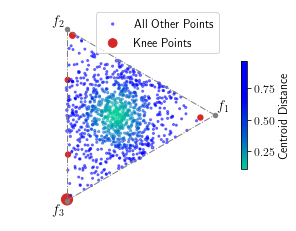

../data/dtlz2/4d/f.csv (2000, 4) ['..', 'data', 'dtlz2', '4d'] dtlz2


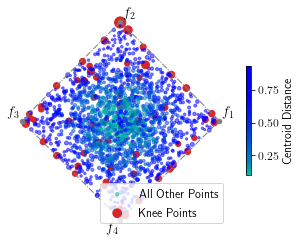

../data/dtlz2/8d/f.csv (4000, 8) ['..', 'data', 'dtlz2', '8d'] dtlz2


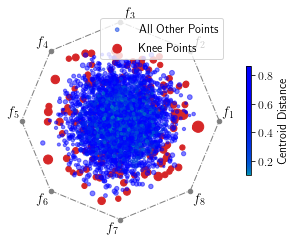

../data/dtlz2-nbi/3d/f.csv (990, 3) ['..', 'data', 'dtlz2-nbi', '3d'] dtlz2-nbi


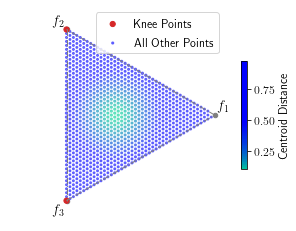

../data/dtlz2-nbi/4d/f.csv (1771, 4) ['..', 'data', 'dtlz2-nbi', '4d'] dtlz2-nbi


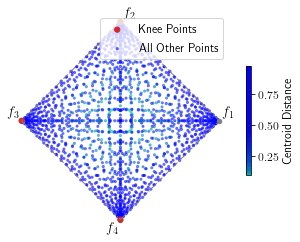

../data/dtlz2-nbi/8d/f.csv (3432, 8) ['..', 'data', 'dtlz2-nbi', '8d'] dtlz2-nbi


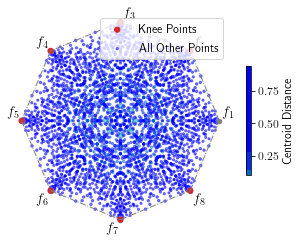

../data/debmdk/3d/f.csv (1047, 3) ['..', 'data', 'debmdk', '3d'] debmdk


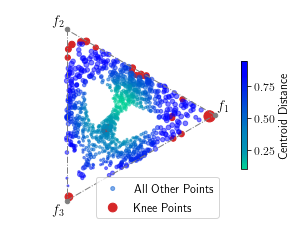

../data/debmdk/4d/f.csv (1967, 4) ['..', 'data', 'debmdk', '4d'] debmdk


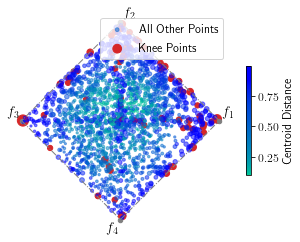

../data/debmdk/8d/f.csv (4077, 8) ['..', 'data', 'debmdk', '8d'] debmdk


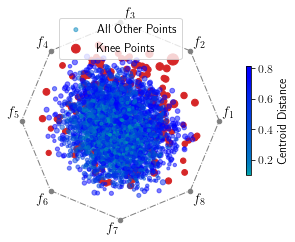

../data/debmdk-nbi/3d/f.csv (1143, 3) ['..', 'data', 'debmdk-nbi', '3d'] debmdk-nbi


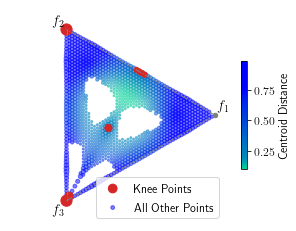

../data/debmdk-nbi/4d/f.csv (2028, 4) ['..', 'data', 'debmdk-nbi', '4d'] debmdk-nbi


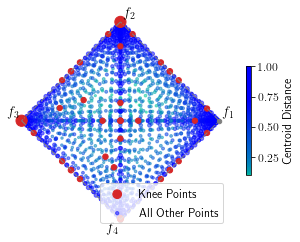

../data/debmdk-nbi/8d/f.csv (3432, 8) ['..', 'data', 'debmdk-nbi', '8d'] debmdk-nbi


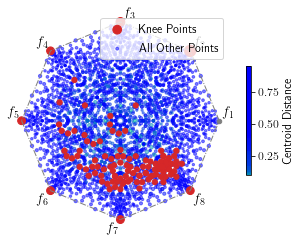

../data/debmdk-all/3d/f.csv (1000, 3) ['..', 'data', 'debmdk-all', '3d'] debmdk-all


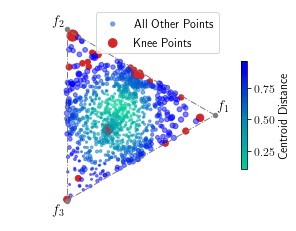

../data/debmdk-all/4d/f.csv (2000, 4) ['..', 'data', 'debmdk-all', '4d'] debmdk-all


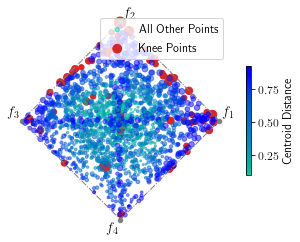

../data/debmdk-all/8d/f.csv (4000, 8) ['..', 'data', 'debmdk-all', '8d'] debmdk-all


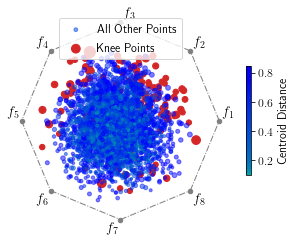

../data/debmdk-all-nbi/3d/f.csv (990, 3) ['..', 'data', 'debmdk-all-nbi', '3d'] debmdk-all-nbi


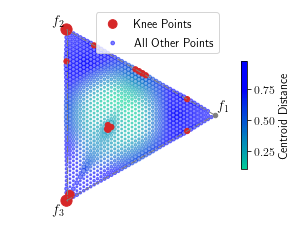

../data/debmdk-all-nbi/4d/f.csv (1771, 4) ['..', 'data', 'debmdk-all-nbi', '4d'] debmdk-all-nbi


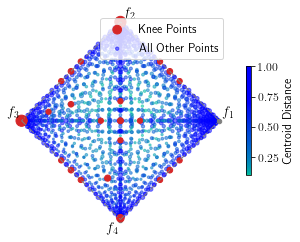

../data/debmdk-all-nbi/8d/f.csv (3432, 8) ['..', 'data', 'debmdk-all-nbi', '8d'] debmdk-all-nbi


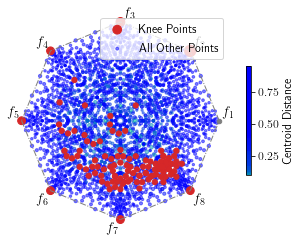

../data/dtlz8/3d/f.csv (1038, 3) ['..', 'data', 'dtlz8', '3d'] dtlz8


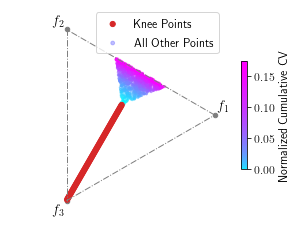

../data/dtlz8/4d/f.csv (2105, 4) ['..', 'data', 'dtlz8', '4d'] dtlz8


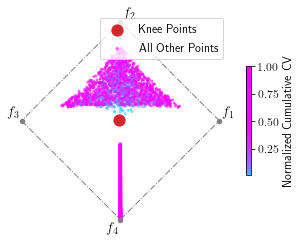

../data/dtlz8/6d/f.csv (2659, 6) ['..', 'data', 'dtlz8', '6d'] dtlz8


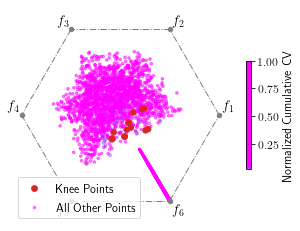

../data/dtlz8/8d/f.csv (3680, 8) ['..', 'data', 'dtlz8', '8d'] dtlz8


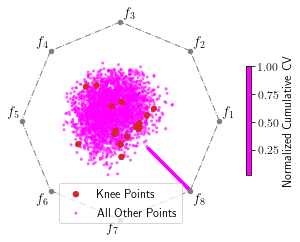

../data/dtlz8-nbi/3d/f.csv (1025, 3) ['..', 'data', 'dtlz8-nbi', '3d'] dtlz8-nbi


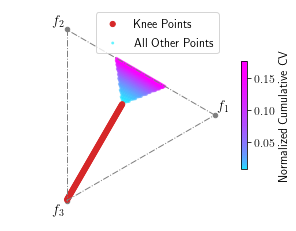

../data/dtlz8-nbi/4d/f.csv (2088, 4) ['..', 'data', 'dtlz8-nbi', '4d'] dtlz8-nbi


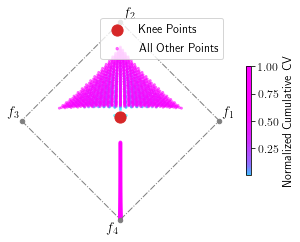

../data/dtlz8-nbi/6d/f.csv (3535, 6) ['..', 'data', 'dtlz8-nbi', '6d'] dtlz8-nbi


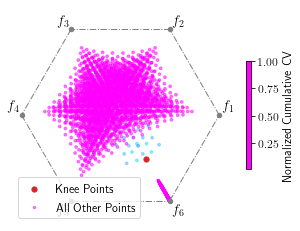

../data/dtlz8-nbi/8d/f.csv (2277, 8) ['..', 'data', 'dtlz8-nbi', '8d'] dtlz8-nbi


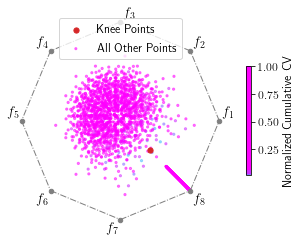

../data/c2dtlz2/3d/f.csv (1086, 3) ['..', 'data', 'c2dtlz2', '3d'] c2dtlz2


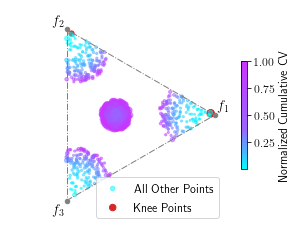

../data/c2dtlz2/4d/f.csv (2088, 4) ['..', 'data', 'c2dtlz2', '4d'] c2dtlz2


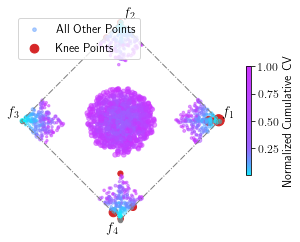

../data/c2dtlz2/5d/f.csv (2098, 5) ['..', 'data', 'c2dtlz2', '5d'] c2dtlz2


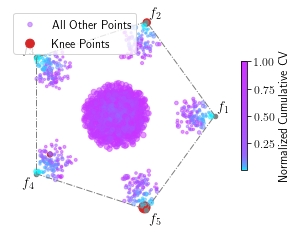

../data/c2dtlz2/8d/f.csv (4305, 8) ['..', 'data', 'c2dtlz2', '8d'] c2dtlz2


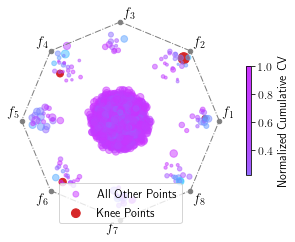

../data/c2dtlz2-nbi/3d/f.csv (1036, 3) ['..', 'data', 'c2dtlz2-nbi', '3d'] c2dtlz2-nbi


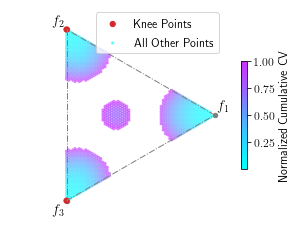

../data/c2dtlz2-nbi/4d/f.csv (1984, 4) ['..', 'data', 'c2dtlz2-nbi', '4d'] c2dtlz2-nbi


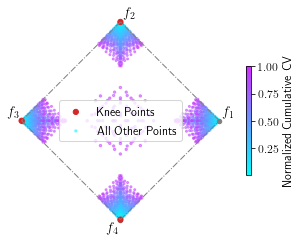

../data/c2dtlz2-nbi/5d/f.csv (2280, 5) ['..', 'data', 'c2dtlz2-nbi', '5d'] c2dtlz2-nbi


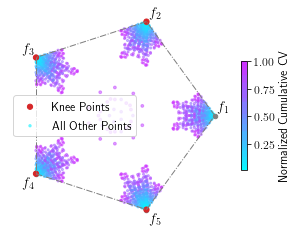

../data/c2dtlz2-nbi/8d/f.csv (3872, 8) ['..', 'data', 'c2dtlz2-nbi', '8d'] c2dtlz2-nbi


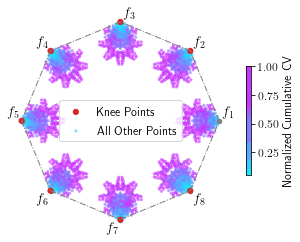

../data/cdebmdk/3d/f.csv (1099, 3) ['..', 'data', 'cdebmdk', '3d'] cdebmdk


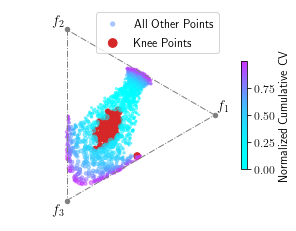

../data/cdebmdk/4d/f.csv (1982, 4) ['..', 'data', 'cdebmdk', '4d'] cdebmdk


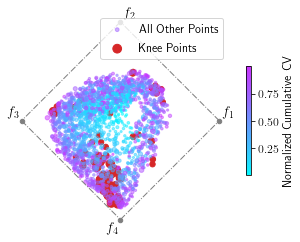

../data/cdebmdk/8d/f.csv (3919, 8) ['..', 'data', 'cdebmdk', '8d'] cdebmdk


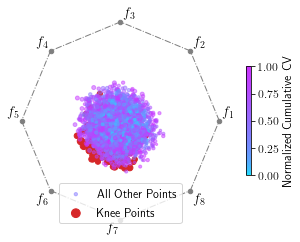

../data/cdebmdk-nbi/3d/f.csv (1049, 3) ['..', 'data', 'cdebmdk-nbi', '3d'] cdebmdk-nbi


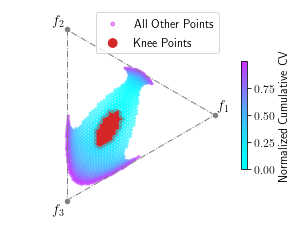

../data/cdebmdk-nbi/4d/f.csv (2042, 4) ['..', 'data', 'cdebmdk-nbi', '4d'] cdebmdk-nbi


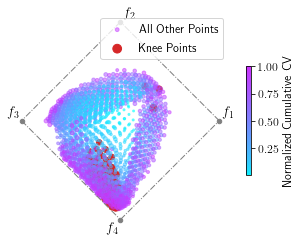

../data/cdebmdk-nbi/8d/f.csv (3380, 8) ['..', 'data', 'cdebmdk-nbi', '8d'] cdebmdk-nbi


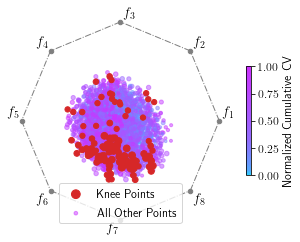

../data/c0dtlz2/3d/f.csv (1002, 3) ['..', 'data', 'c0dtlz2', '3d'] c0dtlz2


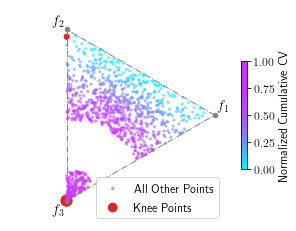

../data/c0dtlz2/4d/f.csv (2003, 4) ['..', 'data', 'c0dtlz2', '4d'] c0dtlz2


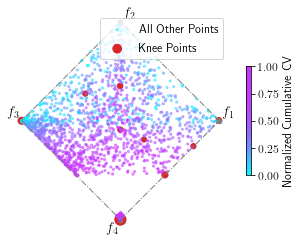

../data/c0dtlz2/8d/f.csv (4005, 8) ['..', 'data', 'c0dtlz2', '8d'] c0dtlz2


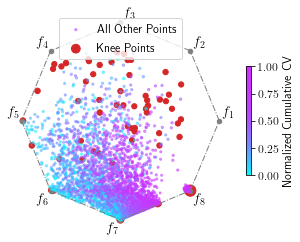

../data/c0dtlz2-nbi/3d/f.csv (983, 3) ['..', 'data', 'c0dtlz2-nbi', '3d'] c0dtlz2-nbi


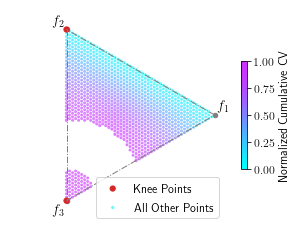

../data/c0dtlz2-nbi/4d/f.csv (1916, 4) ['..', 'data', 'c0dtlz2-nbi', '4d'] c0dtlz2-nbi


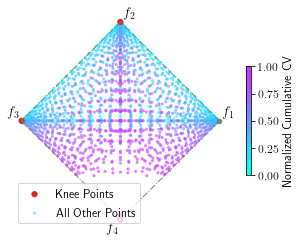

../data/c0dtlz2-nbi/8d/f.csv (3180, 8) ['..', 'data', 'c0dtlz2-nbi', '8d'] c0dtlz2-nbi


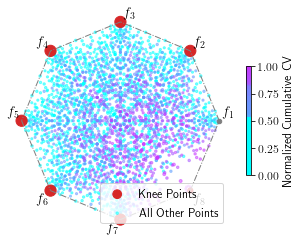

../data/crash-nbi/3d/f.csv (4450, 3) ['..', 'data', 'crash-nbi', '3d'] crash-nbi


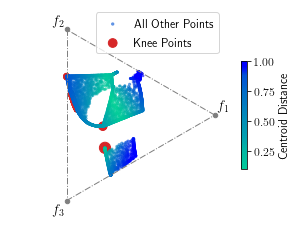

../data/crash-c1-nbi/3d/f.csv (711, 3) ['..', 'data', 'crash-c1-nbi', '3d'] crash-c1-nbi


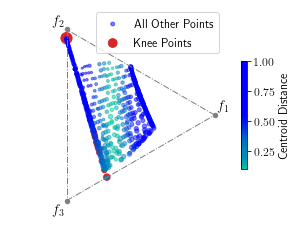

../data/crash-c2-nbi/3d/f.csv (3739, 3) ['..', 'data', 'crash-c2-nbi', '3d'] crash-c2-nbi


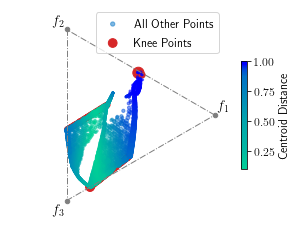

../data/gaa/10d/f.csv (3112, 10) ['..', 'data', 'gaa', '10d'] gaa


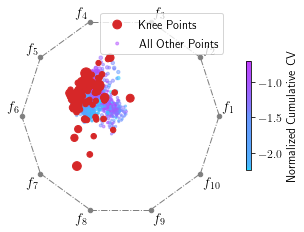

../data/gaa-nbi/10d/f.csv (3112, 10) ['..', 'data', 'gaa-nbi', '10d'] gaa-nbi


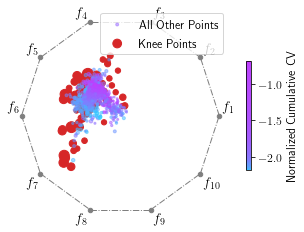

In [3]:
%matplotlib inline
from viz.plotting import radviz

pfs = {'dtlz2': ['3d', '4d', '8d'], \
       'dtlz2-nbi': ['3d', '4d', '8d'], \
       'debmdk': ['3d', '4d', '8d'], \
       'debmdk-nbi': ['3d', '4d', '8d'], \
       'debmdk-all': ['3d', '4d', '8d'], \
       'debmdk-all-nbi': ['3d', '4d', '8d'], \
       'dtlz8': ['3d', '4d', '6d', '8d'], \
       'dtlz8-nbi': ['3d', '4d', '6d', '8d'], \
       'c2dtlz2': ['3d', '4d', '5d', '8d'], \
       'c2dtlz2-nbi': ['3d', '4d', '5d', '8d'], \
       'cdebmdk': ['3d', '4d', '8d'], \
       'cdebmdk-nbi': ['3d', '4d', '8d'], \
       'c0dtlz2': ['3d', '4d', '8d'], \
       'c0dtlz2-nbi': ['3d', '4d', '8d'], \
       'crash-nbi': ['3d'], 'crash-c1-nbi': ['3d'], 'crash-c2-nbi': ['3d'], \
       'gaa': ['10d'], \
       'gaa-nbi': ['10d']}

constrained_pfs = ['dtlz8', 'dtlz8-nbi', 'c2dtlz2', 'c2dtlz2-nbi', 'cdebmdk', 'cdebmdk-nbi', \
                   'c0dtlz2', 'c0dtlz2-nbi', 'gaa', 'gaa-nbi']

for pf in list(pfs.keys()):
    for dim in pfs[pf]:
        fullpathf = "../data/{0:s}/{1:s}/f.csv".format(pf, dim)
        if os.path.exists(fullpathf):
            path, filenamef = os.path.split(fullpathf)
            dirs = path.split('/')
            frontname = dirs[-2]

            # load the front
            F = np.loadtxt(fullpathf, delimiter=',')
            print(fullpathf, F.shape, dirs, frontname)
            
            # decide color and size
            CV, Mu, Ik = load_props(path)
            S,C,D = decide_size_color(pf, dim, CV, Mu, Ik)
            
            # make indices for knee and non-knee points
            I = np.zeros(F.shape[0]).astype(bool)
            I[Ik] = True
            Ip, Ik = ~I, I
            
            # fix point labels
            L = np.array(["" for _ in range(F.shape[0])]).astype(object)
            L[Ip] = "All Other Points"
            L[Ik] = "Knee Points"
            
            # decide what label and gradient to use for the colorbar
            if pf in constrained_pfs:
                cbl = "Normalized Cumulative CV"
                cbg = CV
            else:
                cbl = "Centroid Distance"
                cbg = D
            
            figpath = os.path.join(path, "radviz.pdf")
            with plt.rc_context({"text.usetex": True, "font.size": 12}):
                radviz.plot(F, ax=plt.figure().gca(), s=S, c=C, labels=L, colorbar=(C[Ip], cbg[Ip], cbl))
                # save the fig
                plt.savefig(figpath, bbox_inches='tight', dpi=150)
                plt.show()